# Data Visualization
Visualize the lidar, joystick, and 10m goal data

In [8]:
from dataset import CLIPDataModule, CLIPSet
from termcolor import cprint
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import utils
import os
import glob
%matplotlib inline

## Create CLIPDataModule

In [3]:
dm = CLIPDataModule(data_path='data',
                    batch_size=32,
                    num_workers=10,
                    joy_len=300,
                    include_lidar_file_names=True,
                    verbose=True)

dm.setup()

loading data from data...
skip first 50 frames
batch size: 32
future joystick length: 300

creating training set...


100%|██████████| 11/11 [00:17<00:00,  1.63s/it]


creating validation set...


100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

training size: 30523 samples
validation size: 5104 samples


In [4]:
cprint(f"number of samples: {len(dm.training_set) + len(dm.validation_set)}",
       'green',
       attrs=['bold'])

number of samples: 35627


## Test Training DataLoader
Check if all batches can be retrieved successfully

### Shape Information:
```lidar_stack.shape``` = (batch size, channels, img height, img width) \
```joystick.shape``` = (batch size, joy_len, 3) \
```goal.shape``` = (batch size, 2)


In [12]:
pickle_files = glob.glob(os.path.join('/home/abhinavchadaga/Developer/clip_social_nav/data', '*.pkl*'))
pickle_files

['/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-15-06-15_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-31-02_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-12-14-25-35_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-22-52_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-37-18_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-59-55_reindexed_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-13-43-32_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-13-35-21_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-15-45_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-15-10-32_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-53-18_final.pkl',
 '/home/abhinavchadaga/Developer/clip_social

In [14]:
%%time
# check that all samples can be retrieved
for i, f in enumerate(pickle_files):
    cprint(f'pickle_file_path: {f}', 'white', attrs=['bold'])
    d = CLIPSet(pickle_file_path=f)
    for j in range(len(d)):
        sample = d[j]
    cprint(f'{i + 1}/{len(pickle_files)} completed', 'green', attrs=['bold'])
    

pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-15-06-15_final.pkl
1/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-31-02_final.pkl
2/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-12-14-25-35_final.pkl
3/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-22-52_final.pkl
4/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-37-18_final.pkl
5/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-14-59-55_reindexed_final.pkl
6/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-13-43-32_final.pkl
7/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/2021-11-15-13-35-21_final.pkl
8/15 completed
pickle_file_path: /home/abhinavchadaga/Developer/clip_social_nav/data/

In [15]:
# turn train_dataloader into iterable
trainloader = dm.train_dataloader()
train_iter = iter(trainloader)
print(f'number of batches: {len(trainloader)}')

number of batches: 953


In [26]:
batch = next(iter(trainloader))
print(type(batch))

<class 'list'>


Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/abhinavchadaga/Developer/clip_social_nav/.venv/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/abhinavchadaga/Developer/clip_social_nav/.venv/lib/python3.8/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/home/abhinavchadaga/Developer/clip_social_nav/.venv/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/home/abhinavchadaga/Developer/clip_social_nav/.venv/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once

: 

## Select Random Sample from Training Data

In [7]:
import random

# create CLIPset from larger pkl file
train_set = CLIPSet(pickle_file_path='/home/abhinavchadaga/CS/clip_social_nav/data/2021-11-09-12-58-45_final.pkl', include_lidar_file_names=True)

# select random index
idx = random.randint(0, len(train_set))

# get random sample
sample = train_set[idx]
sample_2 = train_set[idx+1]

Exception: Pickle file does not exist. Please process the pickle file first..

In [13]:
lidar = sample[0][0]
lidar.shape

(5, 401, 401)

## Visualize Lidar Stack 

index: 921, total offset: 50


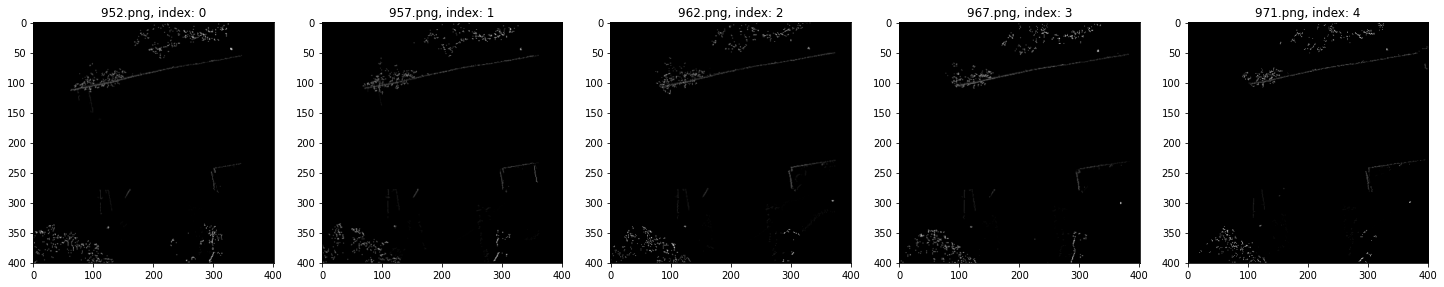

In [8]:
# visualize mode returns lidar stack
# and the corresponding file names
lidar_stack = sample[0][0]
lidar_fnames = sample[0][1]

cprint(f'index: {idx}, total offset: 50', color='green', attrs=['bold'])
utils.visualize_lidar_stack(lidar_stack=lidar_stack, file_names=lidar_fnames)

## Visualize Joystick Data

In table format

In [19]:
import numpy as np

joystick = sample[1]
print('joystick dtype: ', joystick.dtype)
print('joystick shape: ', joystick.shape)

joy_df = pd.DataFrame(data=joystick,
                      columns=['linear_x', 'linear_y', 'angular_z'])
joy_df

joystick dtype:  float32
joystick shape:  (300, 3)


,linear_x,linear_y,angular_z
0,1.6,0.0,0.049760
1,1.6,0.0,0.049760
2,1.6,0.0,0.074592
3,1.6,0.0,0.074592
4,1.6,0.0,0.074592
5,1.6,0.0,0.074592
6,1.6,0.0,0.074592
7,1.6,0.0,0.074592
8,1.6,0.0,0.074592
9,1.6,0.0,0.074592


In [20]:
joy_df_2 = pd.DataFrame(data=sample_2[1],
                      columns=['linear_x', 'linear_y', 'angular_z'])
joy_df_2


,linear_x,linear_y,angular_z
0,1.6,0.0,0.074592
1,1.6,0.0,0.074592
2,1.6,0.0,0.074592
3,1.6,0.0,0.074592
4,1.6,0.0,0.074592
5,1.6,0.0,0.074592
6,1.6,0.0,0.074592
7,1.6,0.0,0.074592
8,1.6,0.0,0.074592
9,1.6,0.0,0.074592


In [18]:
pd.set_option('display.max_rows', 500)

## Goal Information
(x, y) location relative to the current position of the robot

In [10]:
goal = sample[2]
print(f'x: {goal[0]:.2f}, y: {goal[1]:.2f}')

x: 9.87, y: 1.08


In [11]:
import numpy as np

data = pickle.load(open('../data/2021-11-15-15-06-15_final.pkl', 'rb'), encoding='latin1')
lidar_frame_w_goal = utils.visualize_goal(lidar_frame=lidar_stack[-1], goal=goal)
plt.figure(figsize=(10, 10))
plt.imshow(lidar_frame_w_goal);

FileNotFoundError: [Errno 2] No such file or directory: '../data/2021-11-15-15-06-15_final.pkl'